In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import stochtrans1D

In [2]:
deterministic_model = stochtrans1D.StochSaddleNode(0)
xinit = [-1.0,-0.5,0,0.5,-2.0,-5.0]

In [3]:
stoch_model_00 = stochtrans1D.StochSaddleNode(10.0)
stoch_model_0 = stochtrans1D.StochSaddleNode(1.0)
stoch_model_1 = stochtrans1D.StochSaddleNode(0.1)
stoch_model_2 = stochtrans1D.StochSaddleNode(0.01)

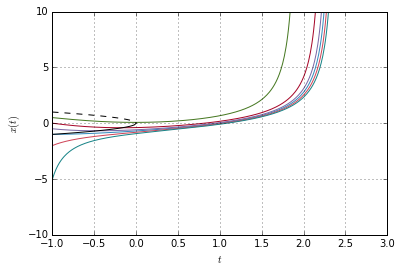

In [39]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(x0,-1.0,T=4,dt=0.01) for x0 in xinit])

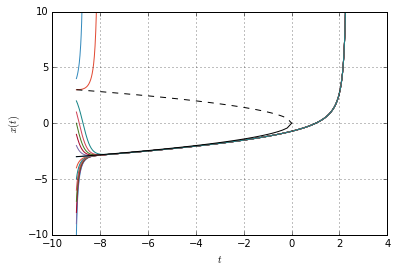

In [13]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(x0,-9.0,T=12,dt=0.01) for x0 in xrange(-10,5)])

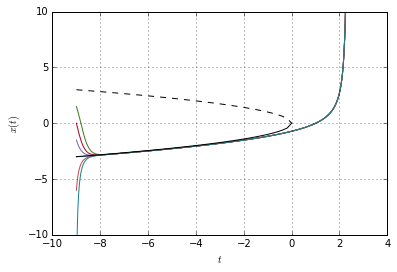

In [14]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

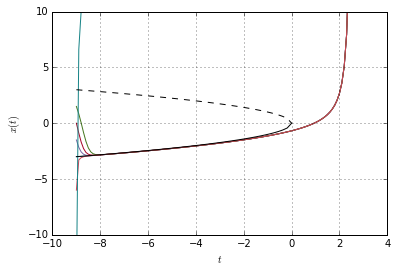

In [15]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(3*x0,-9.0,T=12,dt=0.1) for x0 in xinit])

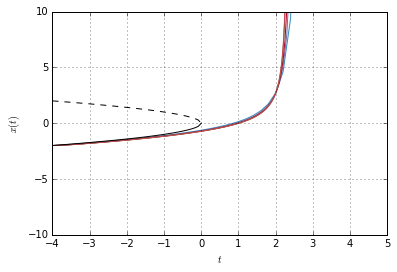

In [16]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(-2.0,-4.0,T=12,dt=deltat) for deltat in [0.2,0.1,0.05,0.01,0.005]])

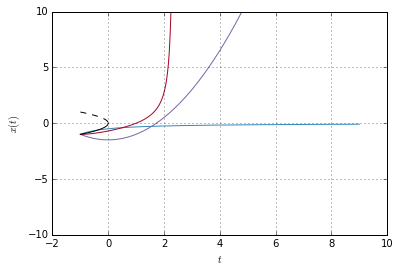

In [120]:
deterministic_model.trajectoryplot(stochtrans1D.StochModel(lambda x,t: x**2,0).trajectory(-1.0,-1.0,T=10,dt=0.01),stochtrans1D.StochModel(lambda x,t: t,0).trajectory(-1.0,-1.0,T=10,dt=0.01),deterministic_model.trajectory(-1.0,-1.0,T=10,dt=0.01))

In [249]:
t,x = deterministic_model.trajectory(-9.0,-3.0,T=13,dt=0.0001)
t = t[np.isfinite(x)]
x = x[np.isfinite(x)]
tstar = t[-1]
print tstar

2.34


In [250]:
(x*(tstar-t))[-10:]

array([  1.79981903e+001,   4.79919574e+001,   2.93908523e+002,
         1.08293363e+004,   1.62971528e+007,   4.24955633e+013,
         3.38601169e+026,   2.54779449e+052,   1.62281419e+104,
         0.00000000e+000])

In [251]:
x[-10:]

array([  1.99979892e+004,   5.99899468e+004,   4.19869319e+005,
         1.80488938e+007,   3.25943056e+010,   1.06238908e+017,
         1.12867056e+030,   1.27389724e+056,   1.62281419e+108,
         2.63352588e+212])

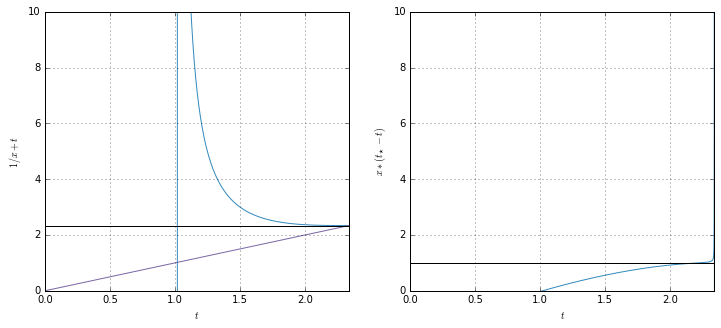

In [253]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
for ax in (ax1,ax2):
    ax.set_xlabel('$t$')
    ax.set_xlim([0,tstar])
    ax.set_ylim([0,10])
    ax.grid()
ax1.set_ylabel('$1/x+t$')
ax2.set_ylabel('$x*(t_\star-t)$')
ax1.plot(t,1/x+t)
ax1.plot(t,t)
ax1.axhline(y=tstar,color='black')
ax2.plot(t,x*(tstar-t))
ax2.axhline(y=1,color='black')
plt.show()

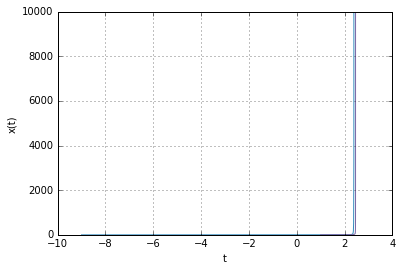

In [207]:
t0,x0 = (-9.0,-3.0)
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_ylim([0,10000])
ax.grid()
ax.plot(*deterministic_model.trajectory(x0,t0,T=13,dt=0.01))
#ax.plot(*stochtrans1D.StochModel(lambda x,t: x**2,0).trajectory(x0,t0,T=13,dt=0.01))
t = np.linspace(1.0,3.0,num=10000)
x = 1/(tstar-t)
ax.plot(t[x>0],x[x>0])
plt.show()

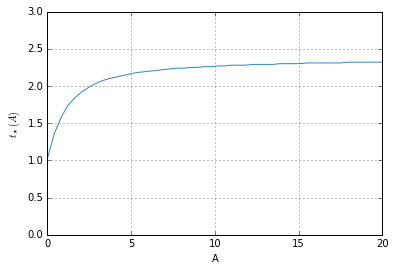

In [119]:
fig = plt.figure()
ax  = plt.axes() 
ax.set_xlabel('A')
ax.set_ylabel('$t_\star(A)$')
ax.set_ylim([0,3])
ax.grid()
ax.plot(*zip(*[(A,deterministic_model.escapetime_sample(-3.0,-9.0,A,ntraj=1,dt=0.01)) for A in np.linspace(0,20)]))
#ax.plot(np.linspace(0.1,20),2.7-1.0/np.linspace(0.1,20))
plt.show()

In [99]:
time = [deterministic_model.escapetime_sample(-3.0,-9.0,A,ntraj=1) for A in np.linspace(0,20)]

In [118]:
deterministic_model.escapetime_sample(-3.0,-9.0,1000000000,ntraj=1,dt=0.01)

array([ 2.43010879], dtype=float32)

In [102]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(lambda t,x: x+1./t,np.linspace(0,20),time)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

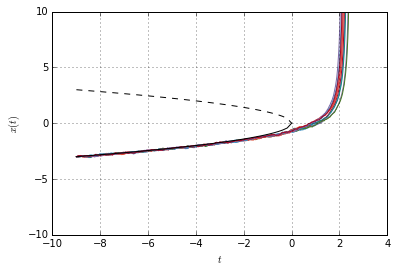

In [4]:
stoch_model_2.trajectoryplot(*[stoch_model_2.trajectory(-3.0,-9.0,T=12,dt=0.01) for k in xrange(0,10)])

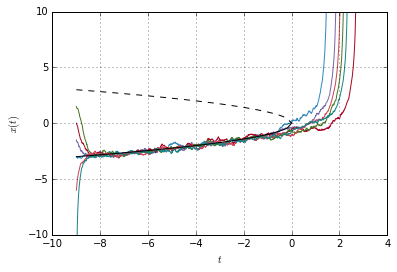

In [18]:
stoch_model_1.trajectoryplot(*[stoch_model_1.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

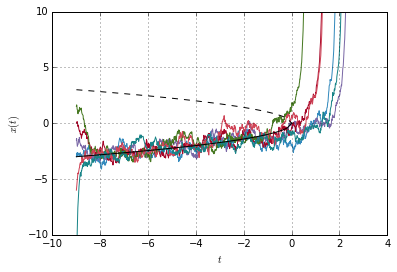

In [34]:
stoch_model_0.trajectoryplot(*[stoch_model_0.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

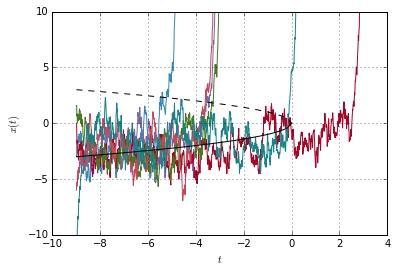

In [36]:
stoch_model_00.trajectoryplot(*[stoch_model_00.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

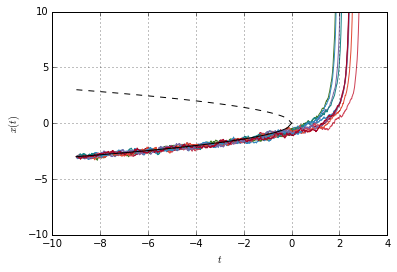

In [19]:
stoch_model_1.trajectoryplot(*[stoch_model_1.trajectory(-3.0,-9.0,T=12,dt=0.01) for k in xrange(0,10)])

In [8]:
def accumean(array):
    return reduce(lambda l,a: l+[l[-1]+a],array,[0])[1:]/np.arange(1,len(array)+1)

In [9]:
def escapetime_avg_cvg(x0,t0,A,*args,**kwargs):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$n_{iter}$')
    ax.set_ylabel('$<t_\star>$')
    ax.set_xscale('log')
    plt.grid()
    maxtraj = kwargs.get('maxtraj',10000)
    for model in args:
        samples = model.escapetime_sample(x0,t0,A,ntraj=maxtraj,**kwargs)
        ax.plot(np.arange(1,len(samples)+1),accumean(samples),linewidth=2,label='$\epsilon=$'+str(model.D0))
        ax.axhline(y=np.mean(samples),linewidth=1,color='#A60628')
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

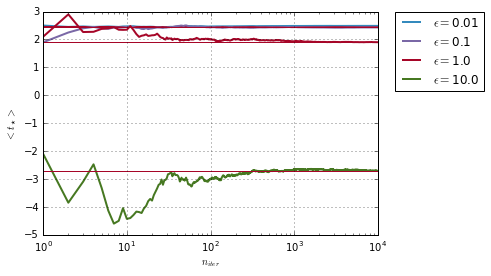

In [11]:
escapetime_avg_cvg(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,maxtraj=10000)

In [7]:
def escapetime_avg(x0,t0,*args,**kwargs):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$\epsilon$')
    ax.set_ylabel('$<t_\star>$')
    ax.set_xscale('log')
    plt.grid()
    ax.axhline(y=t0,linewidth=1,color='black')
    epsvals = [x*10**n/100. for n in xrange(5) for x in xrange(1,10)]
    for A in args:
        line, = ax.plot(epsvals,[np.mean(stochtrans1D.StochSaddleNode(eps).escapetime_sample(x0,t0,A,**kwargs)) for eps in epsvals],linewidth=2,label='A='+str(A))
        ax.axhline(y=deterministic_model.escapetime_sample(x0,t0,A,ntraj=1),linewidth=1,color=line.get_color(),linestyle='dashdot')
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

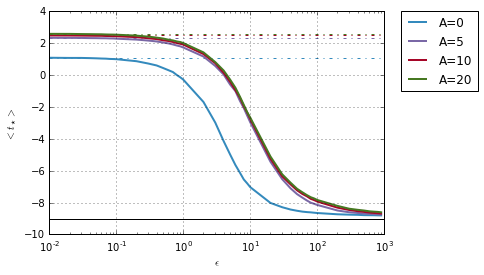

In [8]:
escapetime_avg(-3,-9,0,5,10,20,ntraj=10000)

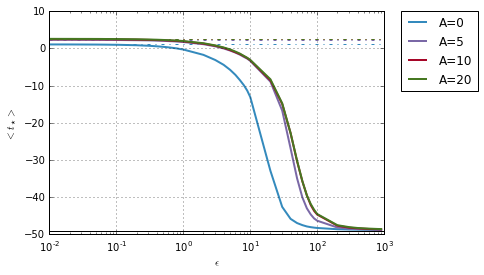

In [10]:
escapetime_avg(-7,-49,0,5,10,20,ntraj=10000)

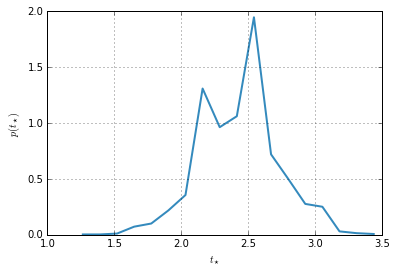

In [6]:
stoch_model_1.escapetime_pdf_plot(-3,-9,10,ntraj=20000)

In [4]:
def escapetime_pdf_cvg(x0,t0,A,model,**kwargs):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    for ax in (ax1,ax2):
        ax.set_xlabel('$t_\star$')
        ax.set_ylabel('$p(t_\star)$')
        ax.grid()    
    ax2.set_yscale('log')
    maxtraj = kwargs.get('maxtraj',100000)
    mintraj = kwargs.get('mintraj',100)
    samples = model.escapetime_sample(x0,t0,A,ntraj=maxtraj,**kwargs)
    while maxtraj >= mintraj:
        hist, rc = np.histogram(samples[:maxtraj],bins='doane',density=True)
        rc = rc[:-1] + 0.5*(rc[1]-rc[0])
        pdf_line1, = ax1.plot(rc,hist,linewidth=2,label='$n_{iter}=$'+str(maxtraj))
        pdf_line2, = ax2.plot(rc,hist,linewidth=2,label='$n_{iter}=$'+str(maxtraj))
        maxtraj /= 10
        if kwargs.get('show_avg',False):
            ax1.axvline(x=np.mean(samples[:maxtraj]),linewidth=1,color=pdf_line1.get_color())
            ax2.axvline(x=np.mean(samples[:maxtraj]),linewidth=1,color=pdf_line2.get_color())
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    fig.subplots_adjust(wspace=0.5)
    plt.show()

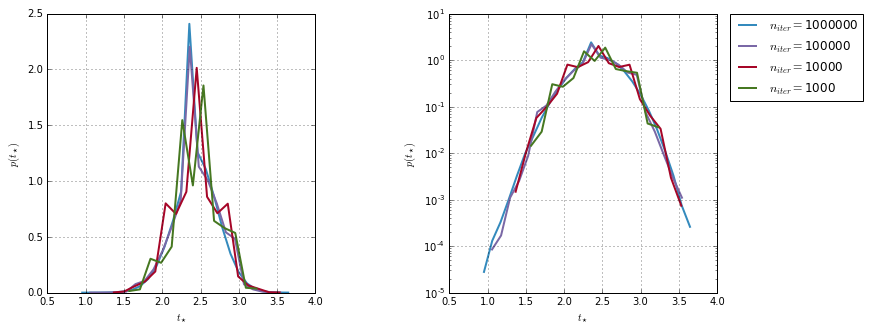

In [89]:
escapetime_pdf_cvg(-3,-9,10,stoch_model_1,maxtraj=1000000,mintraj=1000)

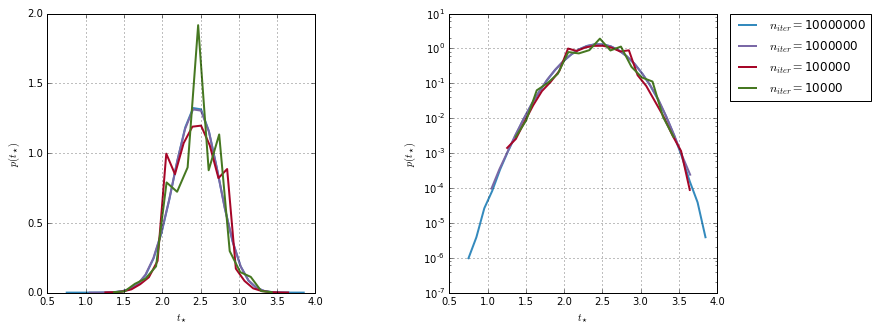

In [5]:
escapetime_pdf_cvg(-3,-9,10,stoch_model_1,maxtraj=10000000,mintraj=10000)

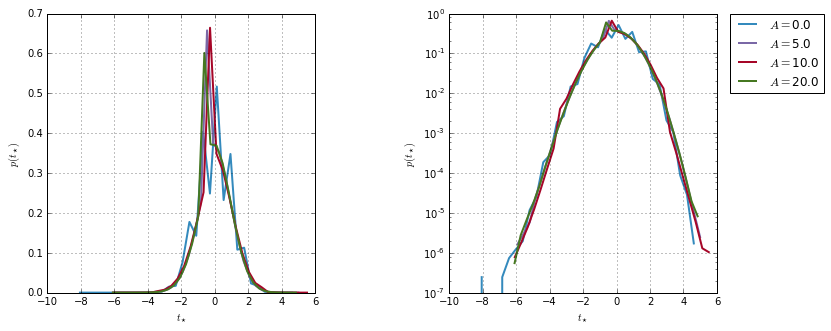

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
for ax in (ax1,ax2):
    ax.set_xlabel('$t_\star$')
    ax.set_ylabel('$p(t_\star)$')
    ax.grid()    
ax2.set_yscale('log')
for A in [0.,5.0,10.0,20.0]:
    pdf = stoch_model_1.escapetime_pdf(-3.0,-9.0,A,ntraj=10000000,standardize=True)
    pdf_line1, = ax1.plot(*pdf,linewidth=2,label='$A=$'+str(A))
    pdf_line2, = ax2.plot(*pdf,linewidth=2,label='$A=$'+str(A))
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
fig.subplots_adjust(wspace=0.5)
plt.show()

In [15]:
def escapetime_pdf_plot(x0,t0,A,*args,**kwargs):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    var = '(t_\star-<t_\star>)/\sigma' if kwargs.get('standardize',False) else 't_\star'
    for ax in (ax1,ax2):
        ax.set_xlabel('$'+var+'$')
        ax.set_ylabel('$p('+var+')$')
        ax.grid()    
    ax2.set_yscale('log')
    for model in args:
        pdf = model.escapetime_pdf(x0,t0,A,**kwargs)
        pdf_line1, = ax1.plot(*pdf,linewidth=2,label='$\epsilon=$'+str(model.D0))
        pdf_line2, = ax2.plot(*pdf,linewidth=2,label='$\epsilon=$'+str(model.D0))
    if kwargs.get('fit',False):
        for ax in (ax1,ax2):
            xx = np.linspace(*ax.get_xlim())
            ax.plot(xx,np.exp(-xx**2/2)/np.sqrt(2*np.pi),color='black')
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    fig.subplots_adjust(wspace=0.5)
    plt.show()

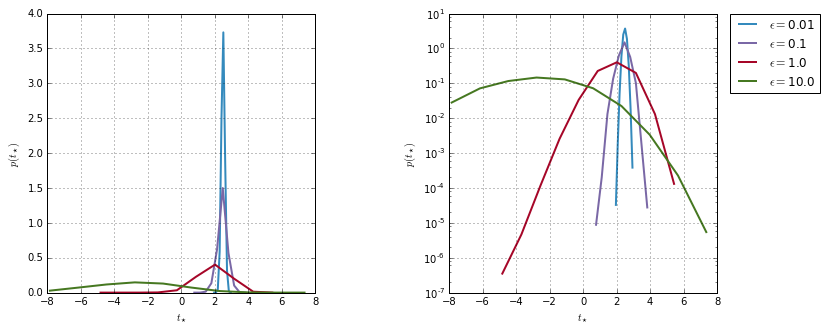

In [36]:
escapetime_pdf_plot(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,bins=10)

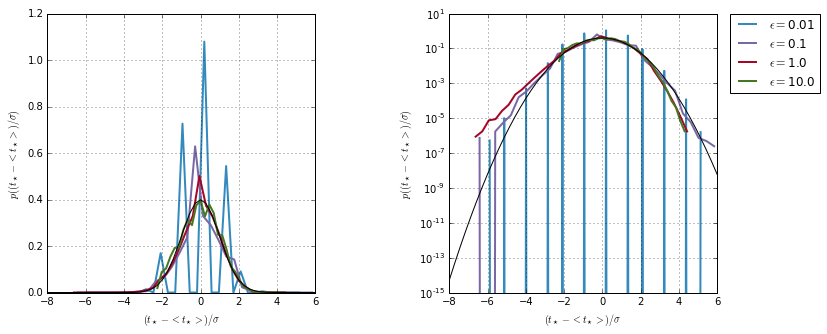

In [16]:
escapetime_pdf_plot(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,standardize=True,fit=True)

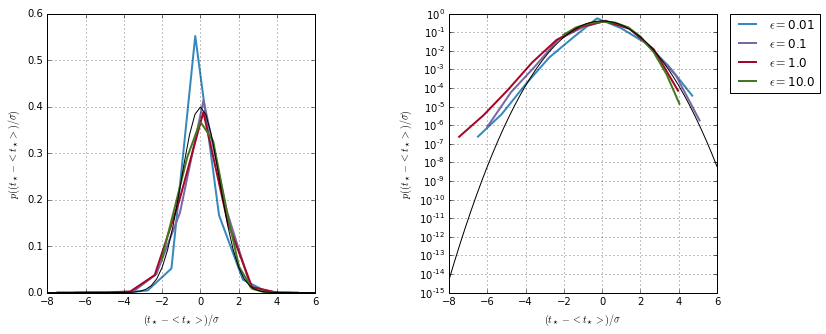

In [35]:
escapetime_pdf_plot(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,standardize=True,fit=True,bins=10)